<a href="https://colab.research.google.com/github/arumshin-dev/python_conda_jupyter/blob/main/codeit/3_1_2_%E1%84%90%E1%85%A6%E1%86%A8%E1%84%89%E1%85%B3%E1%84%90%E1%85%B3%E1%84%87%E1%85%A6%E1%86%A8%E1%84%90%E1%85%A5%E1%84%92%E1%85%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#텍스트 벡터화
백터화는 기본적으로 토큰화와 인코딩 이후 진행됩니다.

<center><img src="https://drive.google.com/uc?export=view&id=1hvP2SzUKbKL8SwgSalFGopS-xU1GZO4c" width="400"/></center>

### 1. Bag-of-Word(BoW)
- 단어의 출현 여부나 횟수만을 기준으로 텍스트를 벡터화함
- 문맥 정보를 반영하기 어려움
### 2. TD-IDF(Term Frequency-Inverse Document Frequency)
- 단어 빈도(TF)와 전체 문서에서의 희소성(IDF)을 결합하여 단어의 중요도 측정
- 비교적 BoW보다 문서내에서의 의미 있는 단어 식별
### 3. Word Embedding
- Word2Vec, Glove등 각 단어를 저차원 벡터로 표현
- 단어간의 의미적 유사성을 벡터 공간에서 반영


## Bag-of-Word(BoW) 빈도 벡터화

빈도벡터화는 텍스트에서 출현한 토큰의 빈도로 벡터를 표현하는 간단한 벡터화 방식입니다


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sentence_tag.csv to sentence_tag (2).csv


In [ ]:
import pandas as pd
df = pd.read_csv('sentence_tag.csv')
df

,id,date,text,rat,text_tag
0,euge****,22.09.16.,새부리 KF94 마스크를 검색하니 네이버 랭킹 상위에 뜨고 가격도 착해서 호기심에 ...,평점5,새부리 검색 네이버 랭킹 상위 가격 호기심 핑크 베이지 색상 서요 화이트 블랙 핑크...
1,gemm****,22.05.03.,컬러 KF94 마스크를 너무나도 기다렸어요\n예쁜 컬러에 벌크포장과 저렴하면서 퀄리...,평점5,컬러 컬러 벌크 포장 퀄리티 내심 제 생각 일치 동호 런 칭 방송 때 신상 포 배 ...
2,gemm****,22.05.06.,컬러 KF94 마스크를 너무나도 기다렸어요\n세상 어디에도 없는 라이트실버 H워월V...,평점5,컬러 세상 어디 라이트 실버 워 월 색상 은단 갈치 페라리 모데나 컬러 색상 신비 ...
3,jina****,22.07.22.,라이브 보고 방송하는언니 쓴거 넘 예뻐서 100개 주문했는데 가로사이즈가 저한테 좀...,평점5,라이브 방송 언니 가로 사이즈 저 사진 부분 밀착 코 와이어 블로그 리뷰 길거리 사...
4,pim4****,22.10.21.,고민고민하다 디럭스 실버를 주문했는데\n진짜 이쁩니다. 과하지 않지만 평범하지도 않...,평점5,고민 고민 디럭스 실버 옷 옷 얼굴 디럭스 사이즈 여유 불편 맘 지인 자신 봉 구매...
...,...,...,...,...,...
2175,goon****,22.05.10.,4중구조인 거에 비해 얇아요 그리고 귀끈이 진짜 편합니다 A사는 귀는 편하나 딱맞는...,평점5,중 구조 귀 끈 귀 느낌 귀 불편 얼굴 아빠 귀 조아 저 대형 처음 회색 조아 곳
2176,bboy****,23.04.04.,가격 싸서 좋아요 하지만\n흰색 마스크를 제외한 컬러가 들어간 마스크는\n코 부분 ...,평점4,가격 흰색 제외 컬러 코 부분 안쪽 사용 시간 보풀 코 부분 개선 필요 문의 안쪽 ...
2177,0019****,22.08.13.,우순 엄청큰 봉투가 와서 놀랏고 ㅋㅋㅋ\n마구마구 넣으신듯한... 상자에 구겨져들어...,평점3,우순 봉투 상자 기분 생각 우리 얼굴 속상 기대 코 부분 옆 팔자 주름 옆 얼굴 끈...
2178,leej****,22.08.21.,기존에 에코브리즈 다른 마스크보다 우선 시원하고 크기도 큼직해서 개인적으로 기미라인...,평점5,기존 에코 브리즈 개인 기미 라인 구렛나루 부분 가을 대비 색 검정 색 브리즈 차이


빈도 벡터화는 `sklearn`의 `CountVectorizer`를 이용하여 구현합니다
- `max_df`: 해당 확률 이상으로 빈도가 많은 토큰을 제외
- `min_df`: 해당 확률 이하로 빈도가 적은 토큰을 제외

`CounterVectorizer`에는 `fit`함수에 문장 목록을 넣어 정보를 입력합니다. 이때 문장에서 띄어쓰기를 기준으로 토큰화하고 사전을 만드므로 미리 필요한 전처리를 진행해주어야 합니다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# 90% 이상으로 빈도가 많은 토큰을 제외
# 10개 이하로 빈도가 적은 토큰을 제외
cvec = CountVectorizer(max_df=0.9, min_df=10)
cvec.fit(df['text_tag']) # 토큰생성(띄어쓰기 기반)

tokens = cvec.get_feature_names_out()   # 토큰 목록 확인
names = cvec.vocabulary_                # 토큰 사전 확인

print(len(tokens))
print(tokens)
print(names)

442
{'새부리': 189, '검색': 18, '네이버': 70, '가격': 0, '핑크': 414, '베이지': 148, '색상': 193, '화이트': 432, '블랙': 173, '무엇': 127, '하루': 416, '라이브': 105, '아침': 248, '라방': 104, '여름': 273, '가을': 7, '겨울': 21, '후기': 439, '중형': 345, '일반': 319, '대형': 86, '사이즈': 181, '남편': 65, '보통': 151, '얼굴': 263, '크기': 383, '남성': 62, '전체': 330, '세로': 204, '사진': 182, '아이': 244, '어른': 260, '비교': 174, '벌크': 147, '포장': 402, '불량': 166, '사용': 179, '가성': 5, '추천': 367, '컬러': 376, '퀄리티': 382, '생각': 196, '방송': 142, '신상': 228, '오픈': 285, '구매': 39, '에코': 269, '브리즈': 171, '나중': 60, '라이트': 106, '실버': 232, '두께': 98, '프로': 408, '스타일': 216, '클래식': 385, '디럭스': 100, '안감': 249, '스펀': 218, '본드': 153, '만족': 118, '부직포': 163, '느낌': 72, '여유': 277, '참고': 358, '부분': 161, '라인': 107, '말씀': 119, '압착': 254, '처음': 361, '기대': 51, '푸름': 405, '니스': 73, '상품': 188, '출시': 369, '세상': 205, '어디': 259, '실내': 229, '언니': 262, '가로': 3, '밀착': 135, '리뷰': 113, '사람': 178, '콧등': 380, '냄새': 68, '자체': 324, '디자인': 101, '고민': 29, '불편': 169, '지인': 348, '연결': 279, '부위': 162, '한

> `get_feature_names_out`함수를 통해 텍스트 뭉치에 포함된 토큰 목록을 확인합니다.

> `vocabulary_`변수를 통해 텍스트 뭉치에 포함된 토큰의 사전을 확인합니다.

> `vocabulary_` : 학습(fit) 후 만들어진 “단어 → 인덱스” 딕셔너리

`fit`가 진행된 `CountVectorizer`에서 `transform`함수를 활용하여 문장목록을 벡터 목록으로 변환 가능합니다.

In [ ]:
text = df.loc[3, 'text_tag']
text

'라이브 방송 언니 가로 사이즈 저 사진 부분 밀착 코 와이어 블로그 리뷰 길거리 사람 잘못 코 부분 최대한 콧등 소용 콧등 부분 밀착 생각 합 중형 끈 색상 촉감 얼굴 안감 공장 냄새 자체 디자인 중형 사이즈 바램'

In [ ]:
import numpy as np
X = cvec.transform([text])  # 인코딩
x = X.toarray()             # 배열로 변환

print(f'형상 확인: {x.shape}')
print(f'벡터 확인: {x}')
print(f'출현 토큰 번호 확인: {np.nonzero(x[0])}')

형상 확인: (1, 442)
벡터 확인: [[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 2 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0]]
출현 토큰 번호 확인: (array([  3,  68, 101, 105, 113, 135, 142, 161, 178,

> 토큰 개수 만큼 길이가 구성된 배열에 각 토큰 인덱스에 해당하는 토큰의 빈도 값으로 할당된 배열이 출력


전체 문장을 빈도 벡터화 하여 텍스트 붕치 내의 토큰의 본도 총합을 구할 수 있습니다.

In [ ]:
import numpy as np
X = cvec.transform(df['text_tag'])
x = X.toarray()
print(f'벡터 형상 확인: {x.shape}')

csum = np.sum(x, axis=0)      # 세로(열) 방향
print(f'총합 벡터 확인: {csum}')

벡터 형상 확인: (2180, 442)
총합 벡터 확인: [ 603   13   47   90   25   79   11   45   76   14   83   11   43  126
   34   18   97  116   11   44   44  117   12   11   41   21   12   40
   22  169   25   12   12   40   16   19  115   11   39 1444  259   15
   16   14   22   17   14   20  192   16   20   69   16   24   73  136
   30  202   14   16   18   51   69   11   97  195   11   45  140   10
   25   16  391   51   37   29  111   24   26   16   24   24   15   67
   27   14  944   12   12   15  102   16   38   12   11   26   20   26
  231   10 1041  154   10   17  186  272  298  129   74   36   19   16
   17  112   11   29  166   16  421   19   12   22   11   13   28   16
  110   75   25   19   54   17   17   37   11  118   12   39   11   73
   22   12  217   19  259   34   15  153  604   18   11  193   68   15
   10   30   24   37   74   21   14  500   18   23   16   15  219   14
   23  228   99  530   11  142  215   69   11   10  114  805   28 1467
  284   29   15   20   15   25  106  219  109

In [ ]:
# 빈도 순으로 정렬
csort_ind = np.argsort(csum)[::-1] # 역순으로 정렬
for i in csort_ind[:10]:
    print(f'{tokens[i]} : {csum[i]}')

사이즈 : 1467
구매 : 1444
얼굴 : 1415
중형 : 1255
디럭스 : 1041
대형 : 944
핑크 : 925
색상 : 827
사용 : 805
에코 : 613


## TD-IDF 벡터화

**TD-IDF** 는 단어의 빈도인 TF에 단어의 역문서 빈도인 IDF(희소성)을 곱한값으로 단어의 중요도를 나타내는 수치로 활용 가능합니다. 이런 TD-IDF값으로 문장을 벡터로 나타내는 것이 TD-IDF벡터화입니다.


TD-IDF 벡터는 `sklearn`모듈의 `TfidVectorizer`를 이용하여 간단하게 구현할 수 있습니다. 활용방법은 `CountVectorizer`와 동일합니다.
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfvec = TfidfVectorizer(max_df=0.9, min_df=10)
tfvec.fit(df['text_tag'])       # 토큰 생성(띄어쓰기 기반)

tokens = tfvec.get_feature_names_out()   # 토큰 목록 확인
names = tfvec.vocabulary_                # 토큰 사전 확인

print(tokens)
print(names)

['가격' '가격대' '가능' '가로' '가로길이' '가성' '가운데' '가을' '가족' '감기' '감사' '감안' '강추' '개별'
 '개봉' '개선' '개인' '걱정' '검색' '검수' '검정' '겨울' '결과' '결론' '경우' '계절' '고객' '고급'
 '고무줄' '고민' '고정' '고집' '고학년' '공간' '공기' '광고' '광대' '교체' '교환' '구매' '구입' '구조'
 '귀걸이' '그거' '그것' '그날' '그동안' '그레' '그레이' '금액' '기능' '기대' '기미' '기본' '기분' '기존'
 '기준' '길이' '나리' '나머지' '나중' '날씨' '남성' '남아' '남자' '남편' '낭비' '낱개' '냄새' '넙대'
 '네이버' '노란색' '느낌' '니스' '다양' '다운' '다음' '다행' '단점' '답변' '당황' '대량' '대부분' '대비'
 '대신' '대체' '대형' '더위' '덕분' '데이즈' '데일리' '도움' '도착' '도톰' '독감' '동생' '동안' '동일'
 '두께' '득템' '디럭스' '디자인' '딸기' '딸아이' '라방' '라이브' '라이트' '라인' '라지' '럭스' '레몬'
 '레몬색' '레이' '리뷰' '리색' '마감' '마음' '마지막' '만족' '말씀' '머리' '먼지' '메이크업' '며칠' '면적'
 '모델' '모양' '무엇' '묶음' '문의' '문제' '물건' '미디' '미세먼지' '미스' '밀착' '바이러스' '박스'
 '반신반의' '반품' '발견' '밝은색' '방송' '방울' '배송' '밴드' '번창' '벌크' '베이지' '보관' '보리' '보통'
 '보풀' '본드' '본인' '볼살' '봉지' '봉투' '부담' '부리' '부모' '부분' '부위' '부직포' '부탁' '분홍'
 '불량' '불량품' '불안' '불편' '브랜드' '브리즈' '브이' '블랙' '비교' '비닐' '비염' '사고' '사람' '사용'
 '사이' '사이즈' '사진' '살구색' '살색' '상세' '상자' '상태' '상품' '새부

In [ ]:
import numpy as np
X = tfvec.transform([text]) # 인코딩
x = X.toarray()

print(f'형상 확인: {x.shape}')
print(f'벡터 확인: {x[0,:100]}')
print(f'출현 토큰 번호 확인: {np.nonzero(x[0])}')

형상 확인: (1, 442)
벡터 확인: [0.         0.         0.         0.18914998 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.17577014 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        

전체 문장에 대한 tf-idf평균 값을 산출하고 정렬하는 예시입니다.

In [ ]:
import numpy as np

X = tfvec.transform(df['text_tag'])
x = X.toarray()

tfmean = np.mean(x, axis=0)
tfsort_ind = np.argsort(tfmean)[::-1]
for i in tfsort_ind[:10]:
    print(f'{tokens[i]} : {tfmean[i]}')

사이즈 : 0.07475292334151314
구매 : 0.07180038270297039
얼굴 : 0.07060486181341881
중형 : 0.06690076212864184
대형 : 0.05752251386284688
핑크 : 0.05554823307510414
디럭스 : 0.05536429348509769
색상 : 0.051958085271497756
사용 : 0.04976534938989779
가격 : 0.04115382666685913


# 텍스트 임베딩

BoW, TF-IDF에서는 단어의 순서, 주변단어 등 문맥에 대한 정보가 제대로 반영되지 않습니다. 즉 단어의 문백적인 의미를 파악할 수 없다는 문제가 존재합니다.

임베딩 기법은 단어를 저차원 벡터 공간에 매핑하여 단어간 의미적 유사도를 학습하여 벡터의 값을 설정합니다.
- **단어 간의 의미 관계 학습**: 의미가 유사하거나 관련이 있는 단어들이 벡터 공간에서 가깝게 배치되어 모델이 의미적 맥락을 더 잘 이해함
- **차원 축소 및 일반화**: 저차원 벡터에 정보를 압축하여 메모리 사용량을 줄이고, 모델 학습시 일반화에 유리

임베딩은 크게 단어 임베딩과 문장 임베딩으로 나뉩니다





## Word2Vec 단어 임베딩

Word2Vec모델은 키워드 간의 유사도를 학습하여 단어 임베딩을 만드는 대표적인 모델입니다.

`gensim`라이브러리를 활용하여 `Word2Vec`모델을 구성하고 학습합니다

In [ ]:
#!pip install "scipy<1.13" "gensim==4.3.3"
!pip install scipy gensim

In [1]:
!sudo apt-get -y install fonts-nanum

## 캐시 갱신
!fc-cache -fv
from matplotlib import font_manager, rc
font_manager.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (17.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and direc

In [ ]:
# import shutil
# import matplotlib as mpl

# # 폰트 캐시 파일을 수동으로 삭제 -- !!!조심!!! 한글이 깨질경우만 실행
# font_cache_dir = mpl.get_cachedir()
# shutil.rmtree(font_cache_dir)

import matplotlib as mpl
import shutil

shutil.rmtree(mpl.get_cachedir(), ignore_errors=True)

Word2Vec는 토큰화된 문장 목록 데이터를 통해 학습이 가능합니다. 기존 전처리된 데이터를 토큰화하여 목록으로 만듭니다.

In [ ]:
import pandas as pd

# 데이터 로드
data = pd.read_csv('sentence_tag.csv')
sentences = data['text_tag'].apply(lambda x: x.split()).to_list()
print(sentences[:10])

[['새부리', '검색', '네이버', '랭킹', '상위', '가격', '호기심', '핑크', '베이지', '색상', '서요', '화이트', '블랙', '핑크', '계열', '무엇', '가격', '메리트', '장바구니', '때', '결제', '하루', '라이브', '타이밍', '운', '아침', '반', '라방', '전', '성공', '당일', '출고', '담날', '봄', '여름', '핑크', '가을', '겨울', '톤', '핑크', '핑크', '베이지', '톤', '맘', '후기', '중형', '일반', '대형', '사이즈', '중형', '나', '남편', '보통', '얼굴', '크기', '남성', '중형', '폭', '얼굴', '전체', '세로', '부족', '사진', '미', '밋', '대형', '아이', '어른', '비교', '사이즈', '벌크', '포장', '때', '불량', '사용', '후기', '일', '가성', '추천'], ['컬러', '컬러', '벌크', '포장', '퀄리티', '내심', '제', '생각', '일치', '동호', '런', '칭', '방송', '때', '신상', '포', '배', '너', '오픈', '구매', '포장', '일', '에코', '브리즈', '무광', '유광', '구성', '나중', '라이트', '실버', '구매', '색상', '요거', '러블리', '두께', '에코', '프로', '스타일', '핏', '클래식', '디럭스', '중구', '조임', '사진', '체감', '숨', '귀', '끈', '두말', '잔소리', '안감', '스펀', '본드', '저', '에코', '프로', '만족', '폭', '닥', '폭', '닥', '부직포', '느낌', '사이즈', '제', '중형', '여유', '저', '참고', '귀', '끈', '클립', '사용', '얼굴', '살', '옆', '부분', '라인', '핏', '측면', '귀', '옆', '주현', '말씀', '압착', '처음', '귀', '끈', '귀', '옆', '귀'

### Word2Vec 학습하기

Word2Vec는 같이 자주 등장하는 단어들을 학습하기 위해 중심단어에서 설정한 윈도우 크기안에 들어오는 단어를 주변단어로 설정하여 학습합니다.

*윈도우 예시*  
<right><img src="https://drive.google.com/uc?export=view&id=1IR4TmZ8dQmfYJgL2iTsJzwy23dzD_O21"
width="400"/></right>



모델에 입력된 단어들은 임베딩 행렬(Embedding Matrix)을 거처 임베딩 벡터로 바뀌고 벡터는 주변단어와의 유사도가 높은 값으로 학습이 진행됩니다.

*임베딩 행렬 예시*
<center><img src="https://drive.google.com/uc?export=view&id=1x2pQNwFxuxx2J3FTrV3cg5kJ49zj9SRe" width="600"/></center>

이때 대표적인 학습 알고리즘으로 **Skip-gram**과 **CBOW**을 활용합니다.

- **Skip-gram**: 중심단어로 주변단어를 예측하는 방식
  - 학습시 입력이 중심단어 라벨이 주변단어
  - 희소 데이터(드물게 등장하는 단어)를 더 잘 학습
  - 계산 비용이 높음

- **CBOW(Continous Bag of Words)**
  - 학습시 입력이 주변단어 라벨이 중심단어
  - 계산비용이 낮고 빠르게 학습

CBOW 예시

<center><img src="https://drive.google.com/uc?export=view&id=1oixJsBXUSo6c00t5fvaIscV4G7s1KUrE" width="600"/></center>


In [ ]:
from gensim.models import Word2Vec

# Word2Vec 모델 학습
model = Word2Vec(sentences, # 학습 문장 세트
                 vector_size=100, # 임베딩 벡터 사이즈
                 window=5,  # 윈도우 크기
                 min_count=2,  # 최소 빈도
                 workers=4,  # 사용 코어 개수
                 sg=1, # 알고리즘 설정
                 epochs=50 # 반복횟수
                )


> `sg=1`: skip-gram 사용

> `sg=0`: CBOW 사용


> 임베딩 벡터 사이즈는 클수록 많은 정보를 담지만 토큰의 개수와 텍스트양에 따라 적절한 값을 설정

In [ ]:
# 상위 10개의 키워드 보기
keywords = model.wv.index_to_key
keywords[:10]

['사이즈', '구매', '얼굴', '중형', '디럭스', '대형', '핑크', '색상', '사용', '때']

#### 유사 키워드 추출

- most_similar()를 통해 코사인 유사도를 계산하여 가까운 상위 키워드 추출


In [ ]:
# 유사한 단어 추출

keyword='사이즈'
similar_words = model.wv.most_similar(keyword, topn=20)
similar_words

# for word, similarity in similar_words:
#     print(f'{word}: {similarity:.4f}')


[('중형', 0.6970093250274658),
 ('대형', 0.6424930691719055),
 ('얼굴', 0.6283316016197205),
 ('저', 0.6192539930343628),
 ('덩치', 0.5949693918228149),
 ('여자', 0.586399495601654),
 ('소', 0.5782278776168823),
 ('분석', 0.5765901803970337),
 ('고등', 0.5764485001564026),
 ('스몰', 0.5739853978157043),
 ('통통', 0.5725159645080566),
 ('고딩', 0.5717035531997681),
 ('남매', 0.5714910626411438),
 ('카', 0.566335916519165),
 ('모자', 0.5661208629608154),
 ('구매', 0.5660949349403381),
 ('스탈', 0.5628172755241394),
 ('두상', 0.5609205961227417),
 ('인대', 0.5597831010818481),
 ('맞음', 0.5525781512260437)]

In [ ]:
# 두개의 키워드를 사용
keywords = ['사이즈', '사용']
similar_words = model.wv.most_similar(positive=keywords, topn=20)
similar_words

[('구매', 0.6428542137145996),
 ('중형', 0.6199200749397278),
 ('저', 0.6185720562934875),
 ('얼굴', 0.5926362872123718),
 ('대형', 0.5828569531440735),
 ('고등', 0.5738292932510376),
 ('덩치', 0.5679141283035278),
 ('큰애', 0.5618320107460022),
 ('인대', 0.5520312190055847),
 ('사려', 0.5463787913322449),
 ('대소', 0.5411680340766907),
 ('큰아이', 0.5405670404434204),
 ('남매', 0.5328049659729004),
 ('분석', 0.5314972400665283),
 ('후반', 0.5271064639091492),
 ('센치', 0.5232083797454834),
 ('입안', 0.5230075120925903),
 ('오다', 0.521623969078064),
 ('다드', 0.5195332765579224),
 ('부부', 0.5172675848007202)]

In [ ]:
# 부정 키워드 사용
keyword = '사이즈'
neg_key = '청소년'
similar_words = model.wv.most_similar(keyword, negative=neg_key, topn=20)
similar_words

[('핏', 0.35293328762054443),
 ('라이트', 0.3322140872478485),
 ('클래식', 0.2946226894855499),
 ('구매', 0.29394254088401794),
 ('색상', 0.285677969455719),
 ('평생', 0.2776121497154236),
 ('추가', 0.27629902958869934),
 ('성인용', 0.27300432324409485),
 ('방어', 0.27126914262771606),
 ('야외', 0.26455721259117126),
 ('소재', 0.2625548839569092),
 ('사용', 0.25700119137763977),
 ('역시', 0.25516772270202637),
 ('지만', 0.24538613855838776),
 ('조절', 0.24384142458438873),
 ('유행', 0.24364325404167175),
 ('코로나', 0.24154053628444672),
 ('어디', 0.24116267263889313),
 ('지하철', 0.24082912504673004),
 ('사계절', 0.23948000371456146)]

### 유사 키워드 시각화(응용)

실제 임베딩 벡터는 매우 큰 차원을 가지기 때문에 그래프로 시각화하기 어렵습니다.
하지만 PCA로 차원추소를 한다면 간단한 산점도 그래프로 시각화가 가능해집니다.



`model.wv[키워드]`를 활용하여 키워드의 임베딩 벡터를 가져옵니다.

In [ ]:
keyword='사이즈'
model.wv[keyword]

array([-7.53993317e-02, -1.59574121e-01,  2.57341057e-01, -1.10660434e-01,
       -3.41517065e-04, -2.17511162e-01,  2.01321289e-01,  5.29760897e-01,
       -8.47549364e-02, -2.04547539e-01,  1.78628877e-01, -1.86674550e-01,
       -1.52139261e-01,  3.39677334e-02,  1.49974376e-01, -2.23717347e-01,
       -1.22181855e-01,  1.76818430e-01, -2.93956608e-01, -3.41889977e-01,
        2.54430026e-01, -3.37805562e-02,  3.61218929e-01, -3.93779166e-02,
       -1.34760691e-02,  5.36395311e-02, -1.91443220e-01,  8.73822123e-02,
       -7.38086849e-02,  8.39730576e-02,  1.12132445e-01,  8.45784470e-02,
       -3.64960730e-02, -3.74849021e-01,  4.46320847e-02,  4.58114624e-01,
        1.19244985e-01, -3.23945373e-01, -3.42972428e-01, -3.04058678e-02,
       -1.44685492e-01, -1.84778318e-01,  3.13096195e-02, -4.75462601e-02,
        1.68365851e-01,  3.06760240e-03, -3.13622624e-01,  2.10686848e-02,
        4.04747166e-02,  2.14372069e-01,  6.05258532e-02, -3.75642553e-02,
       -4.57476713e-02,  

In [ ]:
import numpy as np
keyword='사이즈'
similar_words = model.wv.most_similar(keyword, topn=20)
words = [keyword] + [word for word, _ in similar_words]
vectors = [model.wv[word] for word in words]
np.array(vectors).shape

(21, 100)

#### PCA 차원 축소

`sklearn.decompostion`의 `PCA`를 활용하여 간단하게 PCA 차원 축소가 가능합니다
  - 데이터 분산(Variance)을 최대한 보존하는 방향벡터로 구현
  - 데이터 손실이 발생하긴 하지만 중요 정보는 최대한 유지

`n_components`인자에 남길 차원의 개수를 입력하여 축소합니다.

In [ ]:
from sklearn.decomposition import PCA

# PCA로 2차원 변환
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)
reduced_vectors

array([[-0.27124397,  0.09333494],
       [-0.73843915, -0.21017533],
       [-0.83193777, -0.38322721],
       [-0.63640007,  0.04723131],
       [-0.42397865,  0.49320525],
       [ 0.58778281,  0.52523974],
       [-0.28847781, -0.48628254],
       [-0.09315347,  0.07521136],
       [-0.53008405, -0.2644568 ],
       [ 1.20889119,  1.5504298 ],
       [ 3.19573762, -1.17705695],
       [-0.52108502, -0.73445985],
       [ 0.01385708, -0.14304   ],
       [ 0.43384401,  1.01881985],
       [-0.451968  , -0.49500937],
       [ 0.41311551, -0.44923449],
       [-0.78197252,  0.40936632],
       [ 0.13775379,  0.23565729],
       [-0.414751  , -0.73370379],
       [ 0.15116777,  1.02528378],
       [-0.15865832, -0.39713331]])

#### 산점도 시각화

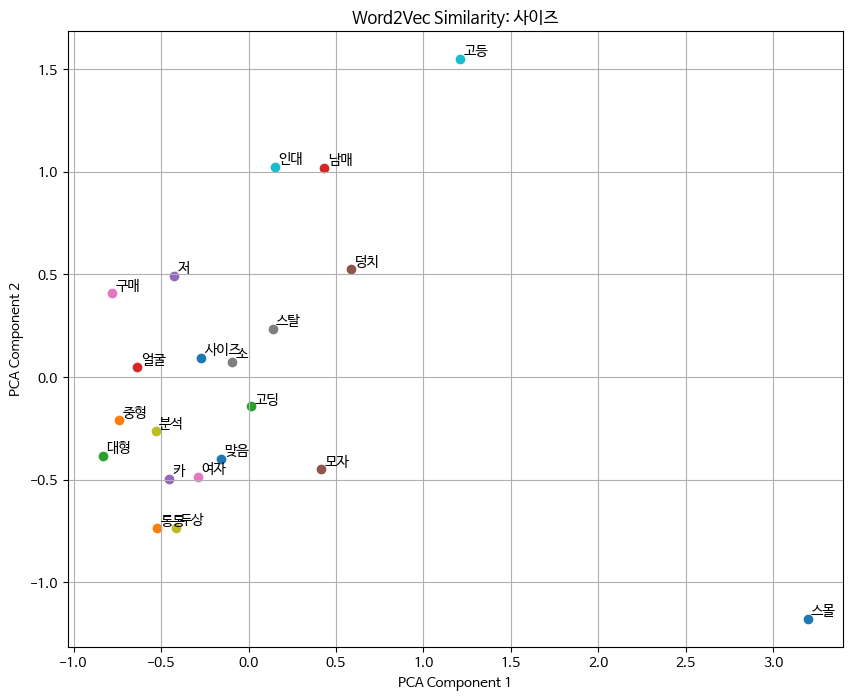

In [ ]:
import matplotlib.pyplot as plt

# 설치된 나눔고딕 폰트를 불러와 Matplotlib의 기본 폰트로 설정
plt.rc('font', family='NanumBarunGothic')
# 음수 부호 사용
plt.rcParams['axes.unicode_minus'] = False

# 산점도 그리기
plt.figure(figsize=(10, 8))

for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, (reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02))

plt.title(f"Word2Vec Similarity: {keyword}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

## FaxtText, Glove 단어 임베딩

기존 Word2Vec학습방식 문제점을 해결하기 위한 다양한 임베딩 모델이 등장하게 됩니다.

### FastText
FastText는 기본적으로 Word2Vec와 유사한 Skip-gram 또는 CBOW 구조를 학습 기반 모델로, 단어를 n-gram으로 분해하는 추가 과정이 들어가 임베딩의 성능을 높입니다.
- Subword(부분단어) 정보 반영
  - Word2Vec와 달리 단어를 여러개의 n-gram으로 나누어 각 n-gram 임베딩을 합산하여 최종 단어 벡터를 구성합니다.
  - 신조어, 희귀어, 띄어쓰기 오류, 형태 변화등이 있는 부분 단어의 벡터를 활용해 비교적 안정적인 임베딩을 얻을 수 있습니다.
- OOV(Out-of-Vacabulary)
  - 기존 Word2Vec는 학습 코퍼스에서 본적 없는 단어(OOV)에 대한 벡터가 정의되지 않으나, FastText는 서브워드 단위의 임베딩을 조합해 벡터를 생성할 수 있으므로 OOV에 대한 대응력이 향상됩니다.

### GloVe(Global Vectors for Word Representation)
GloVe는 Word2Vec처럼 예측 기반 접근이 아니라 전체 코퍼스에서 단어 쌍이 함께 등장하는 횟수(동시 발생빈도)를 집계하여 임베딩 학습을 합니다.
- 전역적 동시 발생 행렬(Co-occurrenc Matrix) 기반
- 전역 정보와 지역 정보 모두 활용
  - GloVe는 문서 전체 차원의 통계와 국소적인 맥락 정보를 모두 반영하여 단어 벡터를 학습합니다
- 희소 행렬처리를 위한 효율성
  - 대규모 단어 사전에서 동시 발생 행렬은 매우 커질수 있으므로, GloVe는 이를 효율적으로 학습하기 위한 비용함수를 정의하고 최적화 기법을 적용해 성능을 높입니다.


### FastText 학습하기

FastText는 단어를 n그램의 서브워드로 쪼개므로 최소 n과 최대 n을 설정해야 합니다.

    최소n: 3
    최대n: 5

    원단어: 안녕하세요
    3-gram: 안녕하, 녕하세, 하세요
    4-gram: 안녕하세, 녕하세요
    5-gram: 안녕하세

In [ ]:
from gensim.models import FastText

# FastText 학습
fasttext_model = FastText(
    sentences,    # 학습 문장 세트
    vector_size=100,  # 임베딩 벡터 사이즈
    window=5,         # 윈도우 크기
    min_count=2,      # 최소 빈도
    min_n=2,          # n-gram 으로 쪼개질때 최소 글자(최소n)
    max_n=6,          # n-gram 으로 쪼개질때 최대 글자(최대n)
    workers=4,        # 사용 코어 개수
    sg=1,             # 1: Skip-gram, 0: CBOW
    epochs=50         # 전체 학습 반복 횟수
)

In [ ]:
# 유사한 단어 추출
keyword = '통통'
similar_words = fasttext_model.wv.most_similar(keyword, topn=20)
similar_words

[('통', 0.8032414317131042),
 ('소짜', 0.7504215240478516),
 ('견질', 0.6992445588111877),
 ('소유자', 0.6977059245109558),
 ('대소', 0.695041835308075),
 ('공통', 0.6721621751785278),
 ('곰', 0.6720043420791626),
 ('탐', 0.6662213206291199),
 ('앞면', 0.6623827815055847),
 ('진짜', 0.6612336039543152),
 ('대', 0.6579604148864746),
 ('뭉텅이', 0.6577768921852112),
 ('방중', 0.6554223895072937),
 ('한국', 0.6533240079879761),
 ('옆길', 0.6530480980873108),
 ('간격', 0.6504673957824707),
 ('중고', 0.6473793983459473),
 ('넓이', 0.6448338031768799),
 ('욕', 0.6444253921508789),
 ('두상', 0.6436094045639038)]

## 문장 임베딩
BERT나 Transformer와 같은 딥러닝 아키텍처를 기반으로한 모델은 문장의 문맥정보를 담고 있는 임베딩을 만들어 낼 수 있습니다.

이를 활용하여 문장간의 유사도를 파악하거나 다양한 자연어 문제를 해결할 수 있습니다.